In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [2]:
train = pd.read_csv("/kaggle/input/playground-series-s5e7/train.csv")

In [3]:
test = pd.read_csv("/kaggle/input/playground-series-s5e7/test.csv")

In [4]:
submission = pd.read_csv("/kaggle/input/playground-series-s5e7/sample_submission.csv")

In [5]:
train.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,id,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,0,0.0,No,6.0,4.0,No,15.0,5.0,Extrovert
1,1,1.0,No,7.0,3.0,No,10.0,8.0,Extrovert
2,2,6.0,Yes,1.0,0.0,NaN,3.0,0.0,Introvert
3,3,3.0,No,7.0,3.0,No,11.0,5.0,Extrovert
4,4,1.0,No,4.0,4.0,No,13.0,NaN,Extrovert


In [6]:
print("Shape:", train.shape)
print("Columns:", train.columns)
print("Missing values:\n", train.isnull().sum())


Shape: (18524, 9)
Columns: Index(['id', 'Time_spent_Alone', 'Stage_fear', 'Social_event_attendance',
       'Going_outside', 'Drained_after_socializing', 'Friends_circle_size',
       'Post_frequency', 'Personality'],
      dtype='object')
Missing values:
 id                              0
Time_spent_Alone             1190
Stage_fear                   1893
Social_event_attendance      1180
Going_outside                1466
Drained_after_socializing    1149
Friends_circle_size          1054
Post_frequency               1264
Personality                     0
dtype: int64


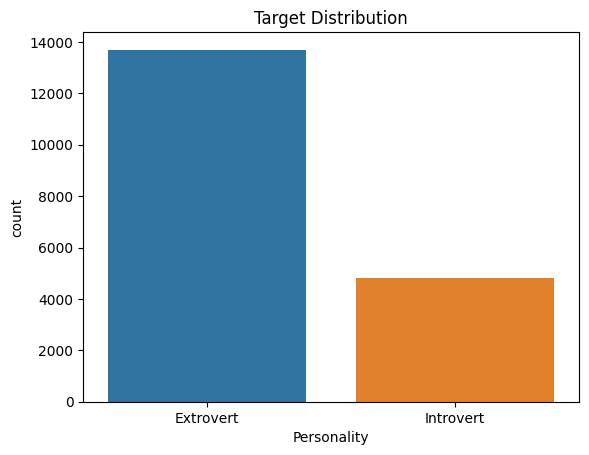

In [7]:
train.describe()
sns.countplot(x=train["Personality"])
plt.title("Target Distribution")
plt.show()

In [8]:
print(train.columns)

Index(['id', 'Time_spent_Alone', 'Stage_fear', 'Social_event_attendance',
       'Going_outside', 'Drained_after_socializing', 'Friends_circle_size',
       'Post_frequency', 'Personality'],
      dtype='object')


In [9]:
from sklearn.preprocessing import LabelEncoder

In [10]:

le = LabelEncoder()
train["Personality"] = le.fit_transform(train["Personality"])

X = train.drop("Personality", axis=1)
y = train["Personality"]

In [11]:
cat_cols = X.select_dtypes(include="object").columns
print("Categorical columns:", cat_cols.tolist())

Categorical columns: ['Stage_fear', 'Drained_after_socializing']


In [12]:
X['is_train'] = 1
test['is_train'] = 0

combined = pd.concat([X, test], axis=0)

In [13]:
combined = pd.get_dummies(combined, columns=['Stage_fear', 'Drained_after_socializing'])

In [14]:
X = combined[combined['is_train'] == 1].drop('is_train', axis=1)
test = combined[combined['is_train'] == 0].drop('is_train', axis=1)

In [15]:
from sklearn.impute import SimpleImputer

# Create the imputer
imputer = SimpleImputer(strategy='most_frequent')  # or 'mean' for numeric

# Fit and transform X and test
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)
test = pd.DataFrame(imputer.transform(test), columns=test.columns)

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [17]:
test_preds = model.predict(test)

# Convert predictions back to original labels
test_preds_labels = le.inverse_transform(test_preds)

# Prepare submission
submission["target"] = test_preds_labels
submission.to_csv("submission.csv", index=False)
submission.head()

,id,Personality,target
0,18524,Extrovert,Extrovert
1,18525,Extrovert,Introvert
2,18526,Extrovert,Extrovert
3,18527,Extrovert,Extrovert
4,18528,Extrovert,Introvert


In [18]:
print(len(submission))

6175
